# *Estudo de caso: Doenças Cardíacas*
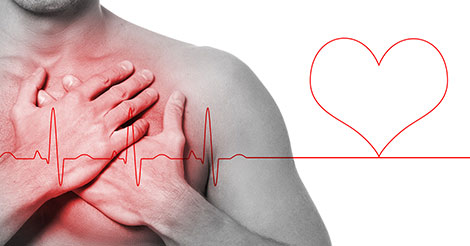


Instalando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from scipy.stats import gmean, hmean

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import plotly as py
import polars as pl

#foi necessario usar pip install -U scikit-learn






# Conjunto de dados e objetivo

* **Disponível em**: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease;
* **Objetivo**: <p>De acordo com a CDC (Centers for Desease Control and Prevention), doenças do coração é uma das principais causas de morte nos Estados Unidos, onde praticamente metade (47%) dos americanos têm pelo menos de um atrês fatores de risco para uma doença cardícaca: Alta pressão sanguínea, alto colesterol e consumo de o habito de fumar. Outros indicadores chave incluem diabetes, obesidade, falta de atividades físicas ou alto consumo de alcool. Identificar e prevenir esses fatores é de suma importância para a saúde da população.</p>
<p>Concomitantemente, o Brasil apresenta comportamento semelhante ao dos Estados Unidos: "No Brasil, cerca de 14 milhões de pessoas têm alguma doença cardiovascular e, pelo menos, 400 mil mortes ocorrem por ano, em decorrência dessas enfermidades, o que corresponde a 30% de todos os óbitos no país." - Aponta a Biblioteca Virtual em Saúde, do ministério da saúde em 29-09-2022. Link: https://bvsms.saude.gov.br/usar-o-coracao-para-cada-coracao-29-9-dia-mundial-do-coracao/ .</p>
<p>Visto a similaridade entre a população norte americana e a brasileira, escolhemos o dataset americano para servir como parâmetro geral para países com características semelhantes (incluindo habitos alimentares, físicos, vícios, doenças, etc) uma vez que o projeto desenvolvido não se preocupa a solucionar somente o caso brasileiro. Além disso o dataset possui uma excelente qualidade para estudo.</p>
<p>Portanto, o objetivo do estudo é indentificar quais fatores mais colaboram para as doenças do coração, possibilitando portanto saber onde agir e de que forma, para qual faixa etária, etnia etc.<br>
Tal objetivo está de acordo com a meta 3.4 da ODS: "Reduzir em um terço a mortalidade prematura por doenças não transmissíveis até 2030.".</p>

# Descrição do conjunto de dados

* Nome: heart_2020_cleaned.csv;
* Tamanho: 24 mb mb;
* Quantidade de registros: 40882;
* Linhas x Colunas: *40882x40*;
* Dados faltantes: NA;

In [ ]:
#leitura arquivo
data = pd.read_csv('heart_2020_cleaned.csv', sep=",")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#conferindo se ocorre valores nulos
valores_nulos_por_coluna = data.isnull().sum()

# Imprimindo a quantidade de valores nulos por coluna
print(valores_nulos_por_coluna)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Análise Exploratória Estatística

**Variáveis relevantes**: O dataset utilizado possui variáveis relevantes que podem se relacionar às doenças cardíacas, como as faixas etárias dos indivíduos, os habitos de saúde, como a prática de esporte, cuidados com a mente, se fuma ou não, além de apresentar características como desordens mentais e motoras.

In [ ]:
# calculando médias aritméticas

def calcular_media_aritmetica(dataframe, colunas):
    medias = {}

    for coluna in colunas:
        if coluna in dataframe.columns:
            media_coluna = np.mean(dataframe[coluna])
            medias[coluna] = media_coluna
            print(f'A média aritmética da coluna {coluna} é: {media_coluna}')
        else:
            print(f'A coluna {coluna} não existe no DataFrame.')

    return medias


colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
medias_resultado = calcular_media_aritmetica(data, colunas)

A média aritmética da coluna BMI é: 28.325398520927465
A média aritmética da coluna PhysicalHealth é: 3.3717100017198516
A média aritmética da coluna MentalHealth é: 3.898366140808956
A média aritmética da coluna SleepTime é: 7.097074688472302


In [ ]:
# calculando médias geométricas

def calcular_media_geometrica(dataframe, colunas):
    medias_geometricas = {}

    for coluna in colunas:
        if coluna in dataframe.columns:
            media_geometrica_coluna = gmean(dataframe[coluna])
            medias_geometricas[coluna] = media_geometrica_coluna
            print(f'A média geométrica da coluna {coluna} é: {media_geometrica_coluna}')
        else:
            print(f'A coluna {coluna} não existe no DataFrame.')

    return medias_geometricas

colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
medias_geometricas_resultado = calcular_media_geometrica(data, colunas)

A média geométrica da coluna BMI é: 27.684925571680296
A média geométrica da coluna PhysicalHealth é: 0.0
A média geométrica da coluna MentalHealth é: 0.0
A média geométrica da coluna SleepTime é: 6.9390345033325405


In [ ]:
def calcular_media_harmonica(dataframe, colunas):
    medias_harmonicas = {}

    for coluna in colunas:
        if coluna in dataframe.columns:
            media_harmonica_coluna = hmean(dataframe[coluna])
            medias_harmonicas[coluna] = media_harmonica_coluna
            print(f'A média harmônica da coluna {coluna} é: {media_harmonica_coluna}')
        else:
            print(f'A coluna {coluna} não existe no DataFrame.')

    return medias_harmonicas

colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
medias_harmonicas_resultado = calcular_media_harmonica(data, colunas)

A média harmônica da coluna BMI é: 27.095801555946235
A média harmônica da coluna PhysicalHealth é: 0.0
A média harmônica da coluna MentalHealth é: 0.0
A média harmônica da coluna SleepTime é: 6.730277815724526


In [ ]:
def calcular_mediana(dataframe, colunas):
    medianas = {}

    for coluna in colunas:
        if coluna in dataframe.columns:
            mediana_coluna = np.median(dataframe[coluna])
            medianas[coluna] = mediana_coluna
            print(f'A mediana da coluna {coluna} é: {mediana_coluna}')
        else:
            print(f'A coluna {coluna} não existe no DataFrame.')

    return medianas

colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
medianas_resultado = calcular_mediana(data, colunas)

A mediana da coluna BMI é: 27.34
A mediana da coluna PhysicalHealth é: 0.0
A mediana da coluna MentalHealth é: 0.0
A mediana da coluna SleepTime é: 7.0


In [ ]:
def calcular_variancia(dataframe, colunas):
    variancias = {}

    for coluna in colunas:
        if coluna in dataframe.columns:
            variancia_coluna = np.var(dataframe[coluna], ddof=1)  # ddof=1 para calcular a variância amostral
            variancias[coluna] = variancia_coluna
            print(f'A variância da coluna {coluna} é: {variancia_coluna}')
        else:
            print(f'A coluna {coluna} não existe no DataFrame.')

    return variancias

colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
variancias_resultado = calcular_variancia(data, colunas)

A variância da coluna BMI é: 40.40000975842417
A variância da coluna PhysicalHealth é: 63.216018625695156
A variância da coluna MentalHealth é: 63.28576738872075
A variância da coluna SleepTime é: 2.0621162791392766


In [ ]:
def calcular_desvio_padrao(dataframe, colunas):
    desvios_padrao = {}

    for coluna in colunas:
        if coluna in dataframe.columns:
            desvio_padrao_coluna = np.std(dataframe[coluna], ddof=1)  # ddof=1 para calcular o desvio padrão amostral
            desvios_padrao[coluna] = desvio_padrao_coluna
            print(f'O desvio padrão da coluna {coluna} é: {desvio_padrao_coluna}')
        else:
            print(f'A coluna {coluna} não existe no DataFrame.')

    return desvios_padrao

colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
desvios_padrao_resultado = calcular_desvio_padrao(data, colunas)

O desvio padrão da coluna BMI é: 6.356100200470739
O desvio padrão da coluna PhysicalHealth é: 7.950850182571368
O desvio padrão da coluna MentalHealth é: 7.955235218943607
O desvio padrão da coluna SleepTime é: 1.4360070609642825


In [ ]:
data.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


- Histogramas

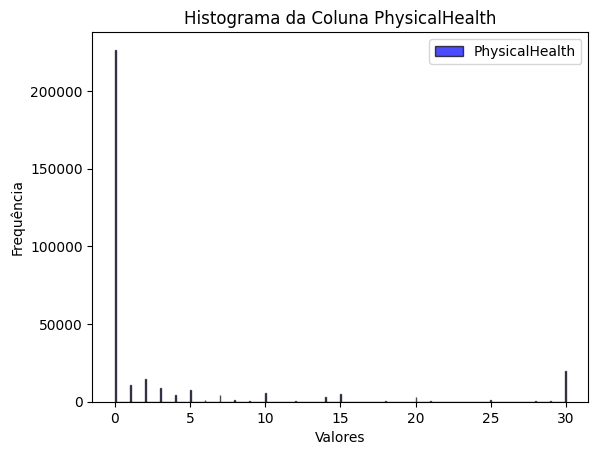

In [ ]:
coluna = 'PhysicalHealth'

plt.hist(data[coluna], bins='auto', alpha=0.7, color='blue', edgecolor='black', label=coluna)

# Rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma da Coluna {coluna}')

plt.legend()

plt.show()

O gráfico de Dias de saúde física demonstram que a grande maioria dos indivíduos não praticam atividade física regularmente.

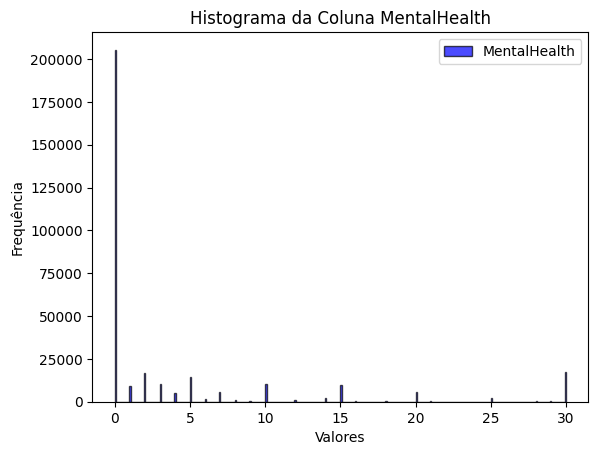

In [ ]:
coluna = 'MentalHealth'

plt.hist(data[coluna], bins='auto', alpha=0.7, color='blue', edgecolor='black', label=coluna)

# Rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma da Coluna {coluna}')

# Adicionar legenda
plt.legend()

plt.show()

O histograma de dias de cuidados da saúde mental é semelhante ao de saúde física, onde as pessoas dão pouco valor aos cuidados com a mente.

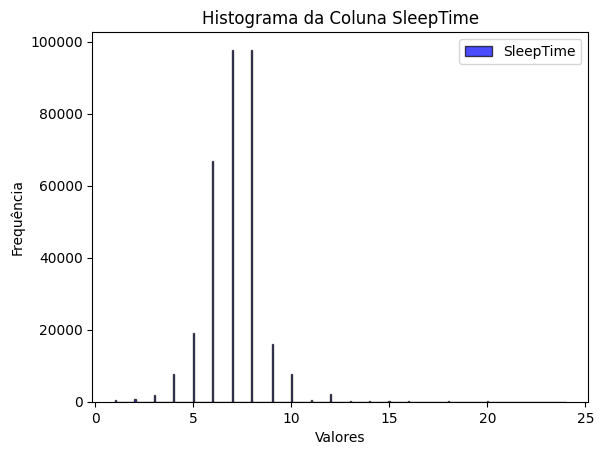

In [ ]:
coluna = 'SleepTime'


plt.hist(data[coluna], bins='auto', alpha=0.7, color='blue', edgecolor='black', label=coluna)

# Rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma da Coluna {coluna}')

# Adicionar legenda
plt.legend()

plt.show()

A quantidade de horas de sono dos indivíduos é dentro do saudável, girando em torno de 7 a 8h dia.

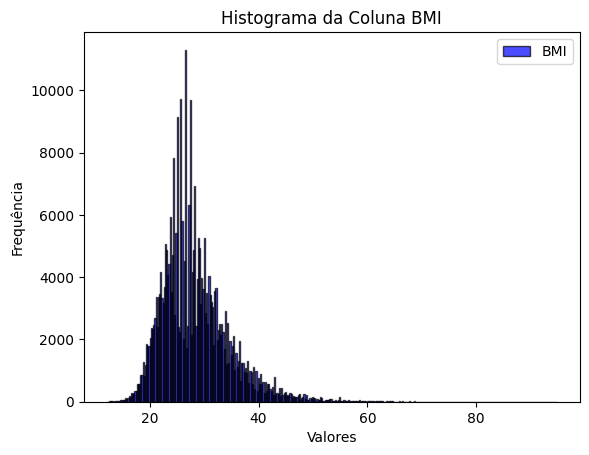

In [ ]:
coluna = 'BMI'

plt.hist(data[coluna], bins='auto', alpha=0.7, color='blue', edgecolor='black', label=coluna)

# Rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma da Coluna {coluna}')

# Adicionar legenda
plt.legend()

plt.show()

Considerando que um IMC de 18,5 a 24,9 é considerado saudável para a maioria das pessoas, o histograma mostra uma faixa boa dentro desse padrão, porém a quantidade de pessoas acima desses valores é alarmante.

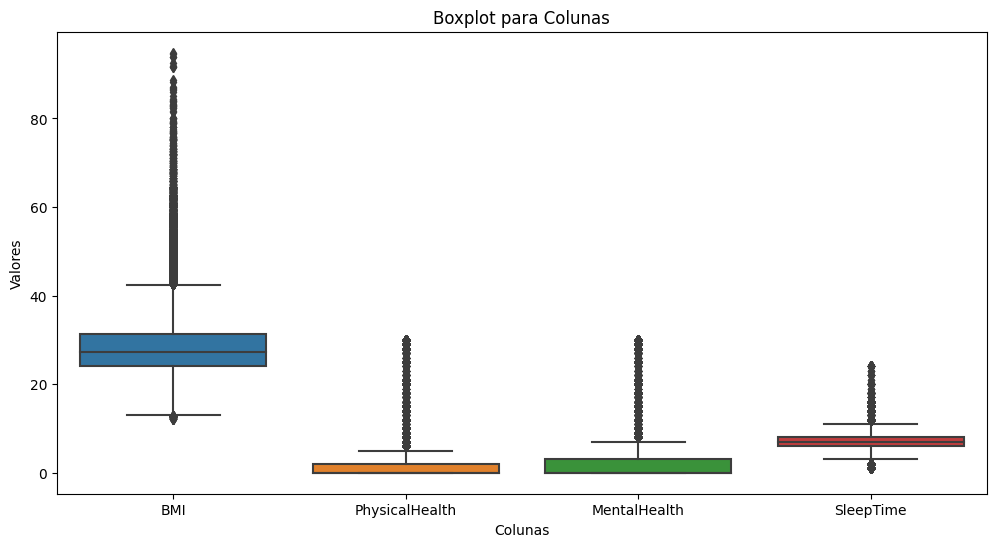

In [ ]:
#Boxplot
colunas = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o boxplot para cada coluna
sns.boxplot(data=data[colunas])
# Adicionar rótulos e título
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Boxplot para Colunas')

# Mostrar o boxplot
plt.show()

Os boxplots apontam para um dado preocupante: Enquanto os indivíduos não se preocupam tanto com elementos benéficos a saude, como atividade física e cuidados mentais, por outro lado a maior porcentagem dos indivíduos apresentam um IMC considerado elevado.

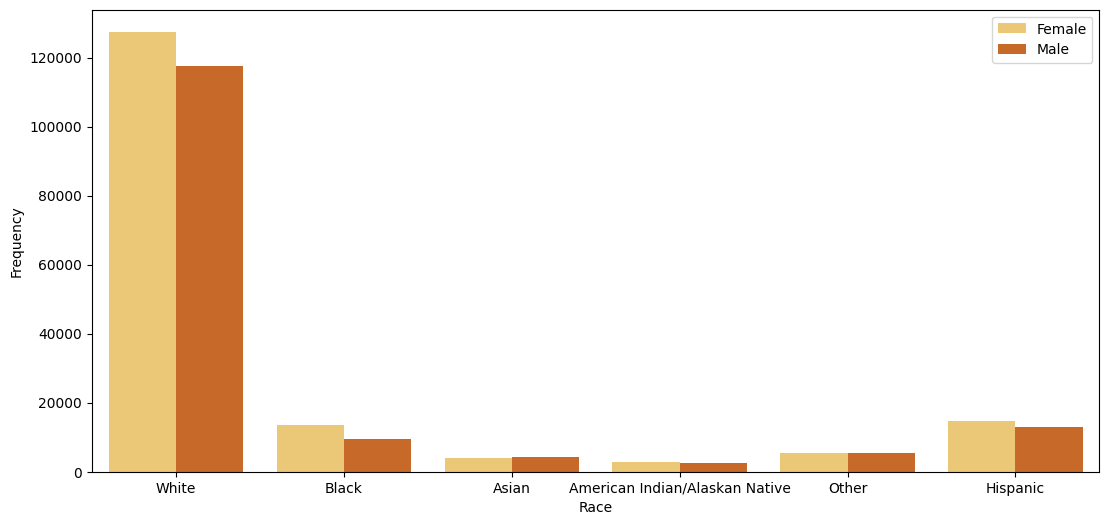

In [ ]:
plt.figure(figsize = (13,6))
sns.countplot( x= data['Race'], hue = 'Sex', data = data, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

Gráfico que demonstra a distribuição de homens e mulheres entre as etnias. O grupo de estudo é predominantemente branco, com quantidades semelhantes entre homens e mulheres.

# Modelo de Classificação


In [ ]:
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Pré-processamento dos dados

**identificando valores únicos das colunas**

In [ ]:
# Função para obter valores únicos e quantidade de valores únicos em uma coluna
def obter_valores_unicos(coluna):
    valores_unicos = coluna.unique()
    qtd_valores_unicos = coluna.nunique()
    return valores_unicos, qtd_valores_unicos

# Obtendo valores únicos e quantidade de valores únicos para cada coluna
for coluna in data.columns:
    valores_unicos, qtd_valores_unicos = obter_valores_unicos(data[coluna])
    print(f"\nColuna: {coluna}")
    print(f"Quantidade de valores únicos: {qtd_valores_unicos}")
    print("Valores únicos:")
    print(valores_unicos)


Coluna: HeartDisease
Quantidade de valores únicos: 2
Valores únicos:
['No' 'Yes']

Coluna: BMI
Quantidade de valores únicos: 3604
Valores únicos:
[16.6  20.34 26.58 ... 62.42 51.46 46.56]

Coluna: Smoking
Quantidade de valores únicos: 2
Valores únicos:
['Yes' 'No']

Coluna: AlcoholDrinking
Quantidade de valores únicos: 2
Valores únicos:
['No' 'Yes']

Coluna: Stroke
Quantidade de valores únicos: 2
Valores únicos:
['No' 'Yes']

Coluna: PhysicalHealth
Quantidade de valores únicos: 31
Valores únicos:
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

Coluna: MentalHealth
Quantidade de valores únicos: 31
Valores únicos:
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

Coluna: DiffWalking
Quantidade de valores únicos: 2
Valores únicos:
['No' 'Yes']

Coluna: Sex
Quantidade de valores únicos: 2
Valores únicos:
['Female' 'Male']

Coluna: Ag

# Definindo variável resposta

Utilizaremos Race como variável resposta, uma vez que nossa aplicação tem como público alvo pessoas de baixa renda e, comumente, é possível encontrar relação entre renda abaixo do desejável e a população negra (e no caso dos Estados Unidos também a população hispânica).

# Lidando com colunas categóricas
<p>Nosso dataframe possui inúmeras colunas categóricas, e utilizaremos algumas delas para o estudo. Para tanto, é necessário trata-las a fim de serem utilizáveis nos procedimentos que virão a diante.</p>
<p>Para as colunas binárias (isto é, apresentam dados Yes e No) utilizaremos LabelEncoding.</p>
<p>Para demais colunas categórias que serão utilizadas, utilizaremos One-Hot encoding.</p>

In [ ]:
#Aplicando labelencoding para colunas binarias e onehotencoding para demais categóricas

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_columns(dataframe, label_encoding_cols, one_hot_encoding_cols):
    for col in label_encoding_cols:
        if col in dataframe.columns:
            le = LabelEncoder()
            dataframe[col] = le.fit_transform(dataframe[col])
        else:
            print(f"A coluna {col} não existe no DataFrame.")

    for col in one_hot_encoding_cols:
        if col in dataframe.columns:
            encoder = OneHotEncoder(drop='first', sparse=False)
            encoded_cols = pd.DataFrame(encoder.fit_transform(dataframe[[col]]), columns=[f"{col}_{category.split('_')[-1]}" for category in encoder.get_feature_names_out([col])])
            dataframe = pd.concat([dataframe, encoded_cols], axis=1)
            dataframe.drop(col, axis=1, inplace=True)
        else:
            print(f"A coluna {col} não existe no DataFrame.")

    return dataframe

# Exemplo de uso:
# Suponha que 'df' é o seu DataFrame e as listas 'label_encoding_cols' e 'one_hot_encoding_cols' contêm os nomes das colunas para cada tipo de codificação.
label_encoding_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                       'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma',
                       'KidneyDisease', 'SkinCancer']

one_hot_encoding_cols = ['AgeCategory', 'Diabetic', 'GenHealth']

data = encode_columns(data, label_encoding_cols, one_hot_encoding_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,White,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,White,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,White,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,White,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#removendo colunas que não serão utilizadas utilizar se necessario
colunas_para_remover = []
data = data.drop(colunas_para_remover, axis=1)


In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,White,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,White,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,White,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,White,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Separando os dados

In [ ]:
# dividindo o conjunto de dados em treinamento do modelo e teste do modelo
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(columns = 'Race')
y = data['Race']

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
95877,0,23.33,1,0,0,0.0,0.0,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
228939,1,27.46,1,0,1,30.0,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
260256,0,32.69,0,0,0,2.0,2.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84785,0,31.32,0,0,0,0.0,0.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83845,1,24.63,1,0,0,2.0,10.0,0,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train.head(5)

95877        White
228939       White
260256    Hispanic
84785        White
83845        White
Name: Race, dtype: object

# Transformando os dados
- Normalização: escalonamento Min-Max no qual o range de valores da coluna irá fica de 0 (min) até 1 (max);
- Modifica a distribuição para que a média seja igual a zero e desvio padrão igual a 1.

In [ ]:
from sklearn.preprocessing import normalize, StandardScaler

# Separando colunas numéricas e categóricas no conjunto de treinamento
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Padronizando apenas colunas numéricas no conjunto de treinamento
scaler = StandardScaler()
x_train_numeric_standardized = pd.DataFrame(scaler.fit_transform(x_train[numeric_cols]), columns=numeric_cols)

# Normalizando o conjunto de treinamento padronizado
x_train_numeric_standardized_normalized = normalize(x_train_numeric_standardized, norm='l2', axis=0)

In [ ]:
# Convertendo o array NumPy de volta para um DataFrame
x_train_numeric_standardized_normalized_df = pd.DataFrame(x_train_numeric_standardized_normalized, columns=numeric_cols)

# Exibindo as primeiras linhas do DataFrame
print("Conjunto de Treinamento Numérico Normalizado e Padronizado:")
x_train_numeric_standardized_normalized_df.head()

Conjunto de Treinamento Numérico Normalizado e Padronizado:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-0.000603,-0.001554,0.002360,-0.000535,-0.000390,-0.000837,-0.000969,-0.000793,0.002080,0.001063,...,-0.000648,0.007374,-0.000564,-0.000292,-0.000757,-0.000177,-0.000689,-0.001266,-0.000379,0.002659
1,0.006481,-0.000271,0.002360,-0.000535,0.010024,0.006633,-0.000969,-0.000793,0.002080,0.001063,...,-0.000648,-0.000530,-0.000564,-0.000292,-0.000757,-0.000177,-0.000689,0.003087,-0.000379,-0.001470
2,-0.000603,0.001354,-0.001656,-0.000535,-0.000390,-0.000339,-0.000472,-0.000793,0.002080,-0.003676,...,-0.000648,-0.000530,-0.000564,-0.000292,-0.000757,-0.000177,-0.000689,-0.001266,-0.000379,0.002659
3,-0.000603,0.000929,-0.001656,-0.000535,-0.000390,-0.000837,-0.000969,-0.000793,-0.001879,0.001063,...,-0.000648,-0.000530,-0.000564,-0.000292,-0.000757,-0.000177,-0.000689,-0.001266,-0.000379,-0.001470
4,0.006481,-0.001150,0.002360,-0.000535,-0.000390,-0.000339,0.001516,-0.000793,0.002080,0.001063,...,-0.000648,-0.000530,0.006925,-0.000292,0.005165,-0.000177,-0.000689,0.003087,-0.000379,-0.001470


# Correlação das variáveis

<ipython-input-19-7208abc7af1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


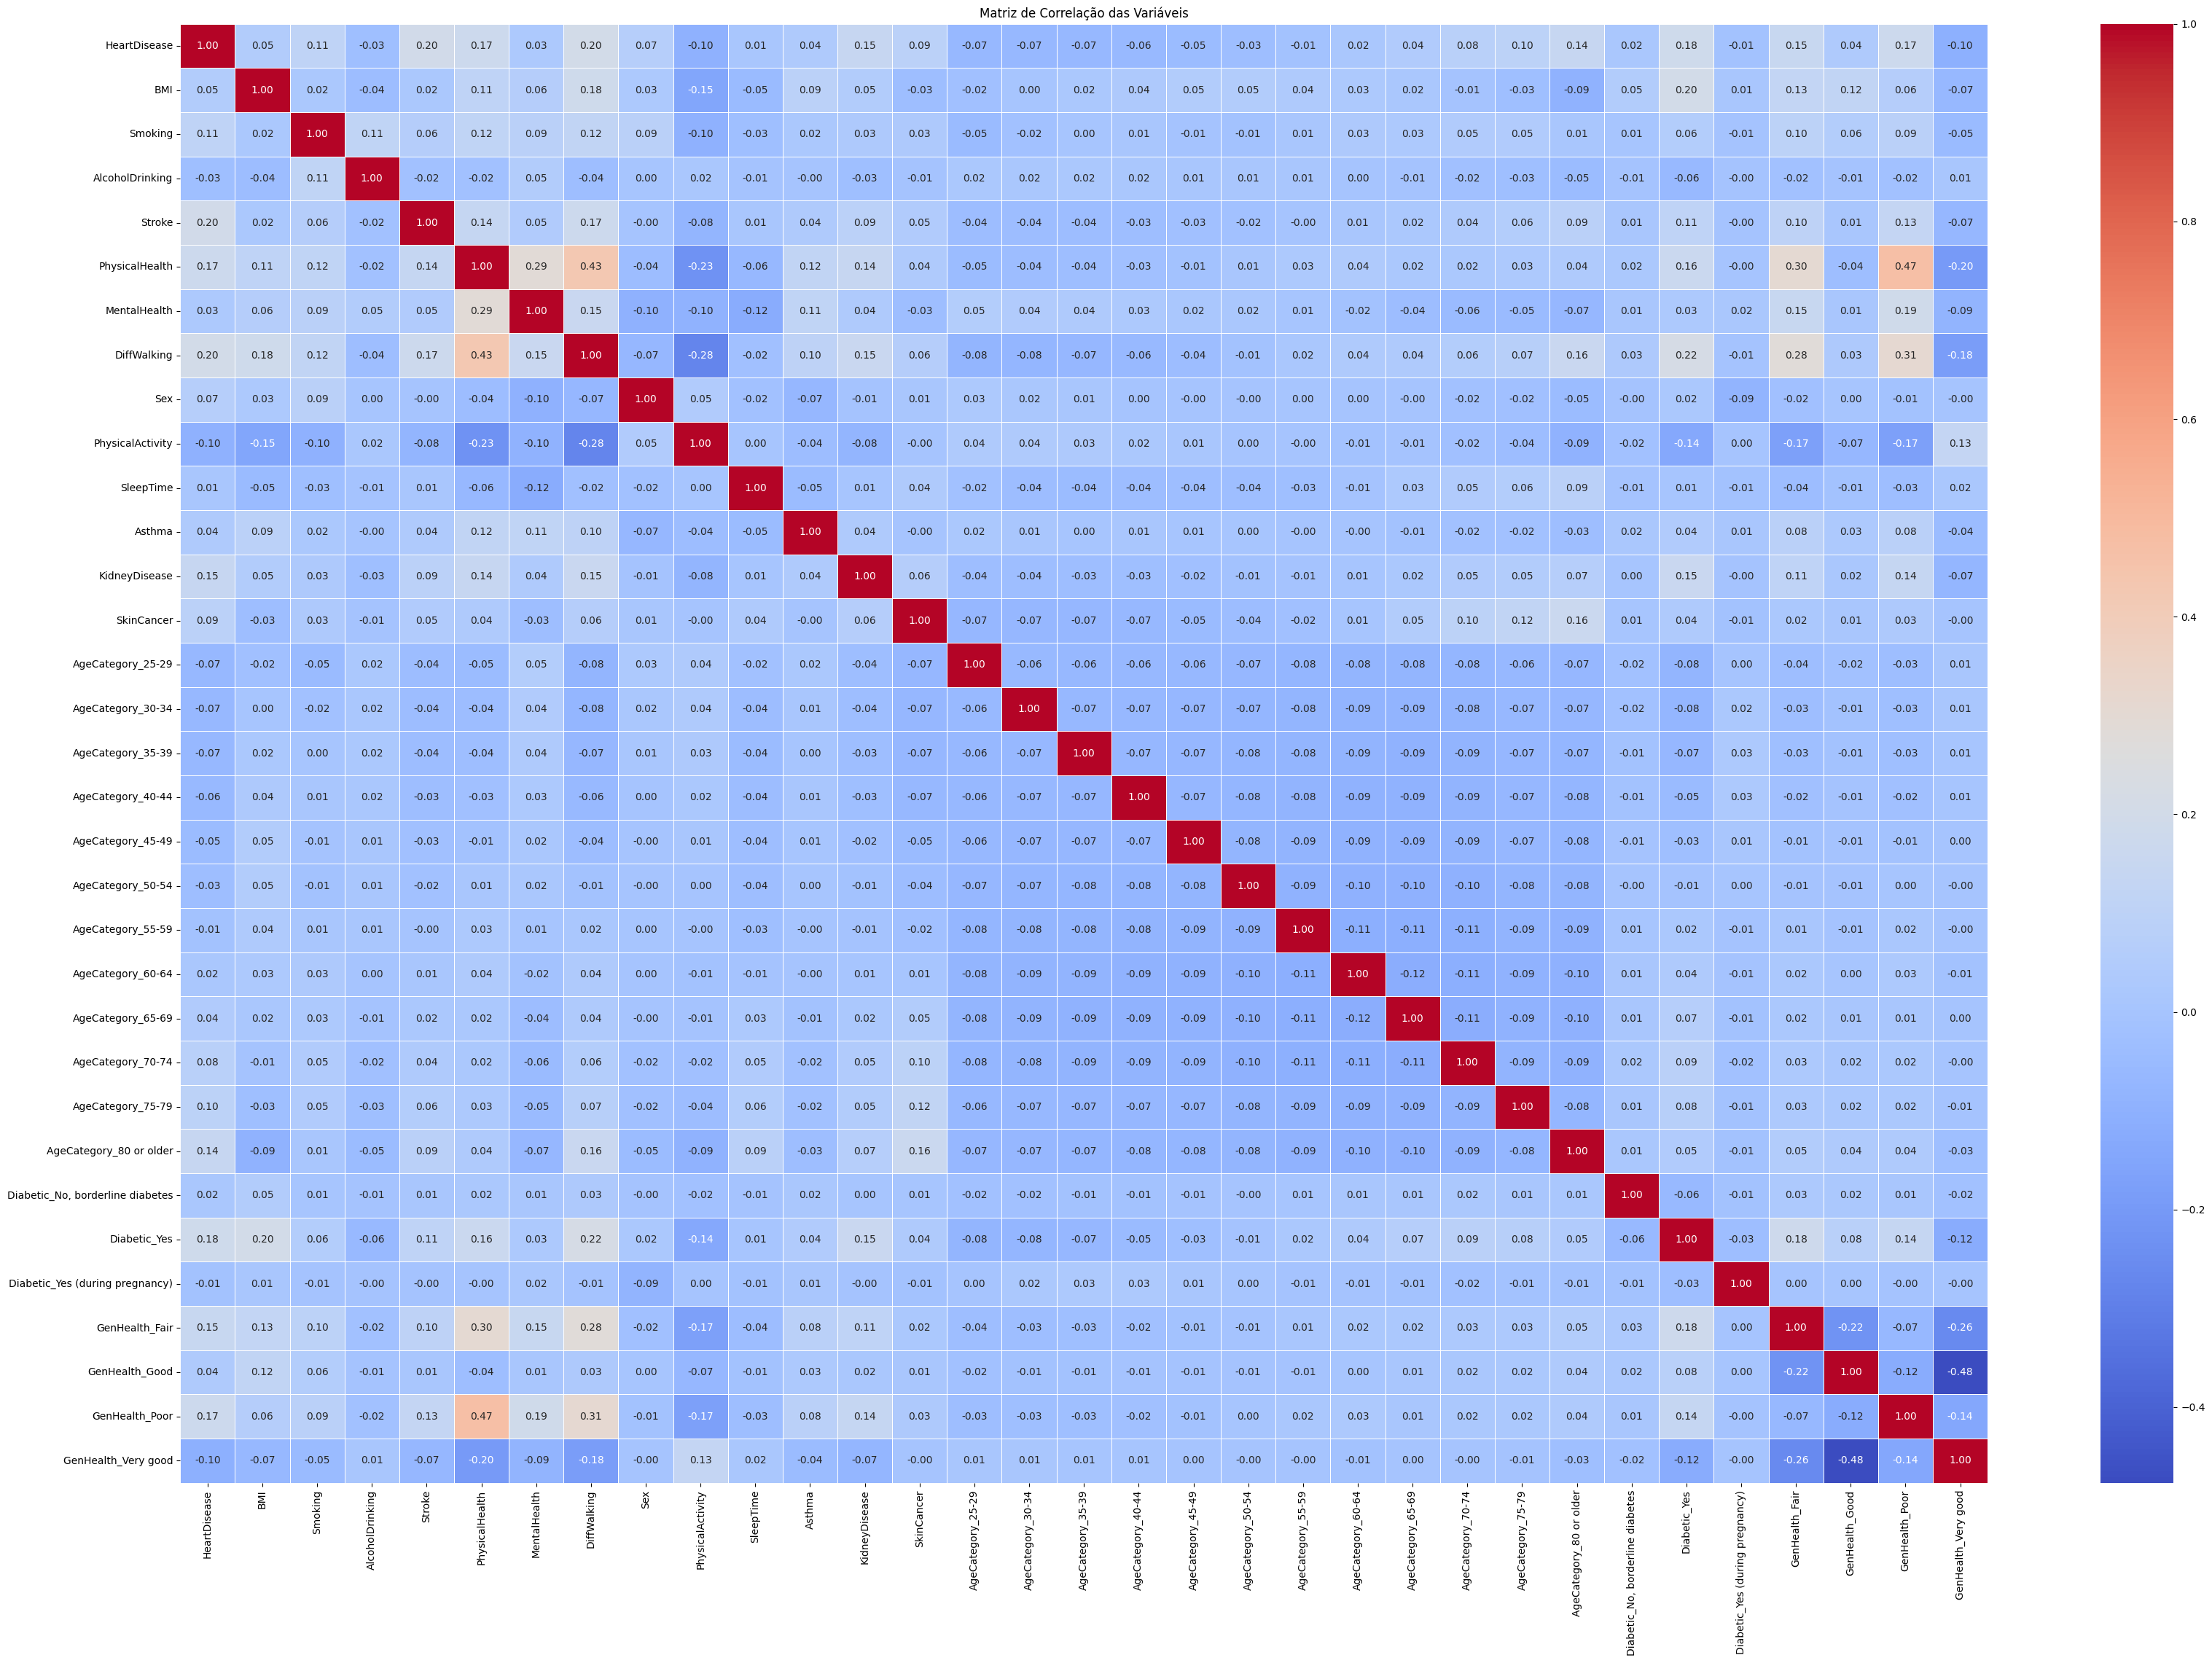

In [ ]:
# Mapa de calor completo. Utilizar somente se desejar ver o conteúdo integral, pois se mostrou muito grande e de difícil visualização.
correlation_matrix = data.corr()

# Criando um mapa de calor usando Seaborn
plt.figure(figsize=(40, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

**Inferencias a partir do gráfico**:
- O grafico aponta que indivíduos com dificuldades de se locomover tem consideráveis chances de ter a saúde física afetada;
- Quando a saúde geral é pobre, existe uma considerável chance da saúde física ser afetada;
- Curiosamente o derrame não tem forte relação com as faixas etárias, embora seja levemente maior para os 80 +;
- A saúde mental parece afetar a saúde física, em um percentual considerável.
- O IMC (BMI) parece ter uma relação razoável com a chance de ter diabetes.


# Treinando o algoritmo

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [ ]:
# Passando apenas o x de teste,
# o algoritmo é que nos dira qual é o y
y_predicoes = lda.predict(x_test)

In [ ]:
y_predicoes

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype='<U30')

# Modelos de classificação

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

**Precision (Precisão)**:
A precisão é a proporção de verdadeiros positivos (instâncias corretamente classificadas como positivas) em relação ao total de instâncias classificadas como positivas (verdadeiros positivos + falsos positivos).
Valores: Quanto mais próximo de 1, melhor. Indica a precisão das predições positivas.

**Recall (Revocação ou Sensibilidade)**:
O recall é a proporção de verdadeiros positivos em relação ao total de instâncias verdadeiramente positivas (verdadeiros positivos + falsos negativos).
Valores: Quanto mais próximo de 1, melhor. Indica a capacidade do modelo de recuperar todas as instâncias positivas.

**F1-Score**:
O F1-Score é a média harmônica ponderada de precisão e recall. É uma métrica que equilibra precisão e recall.
Valores: Quanto mais próximo de 1, melhor. Indica um equilíbrio entre precisão e recall.

**Support**:
O suporte é o número total de instâncias de cada classe no conjunto de dados de teste.
Valores: Números mais altos indicam que a classe tem mais instâncias no conjunto de dados.

**Accuracy (Acurácia)**:
A acurácia é a proporção de instâncias corretamente classificadas em relação ao total de instâncias.
Valores: Quanto mais próximo de 1, melhor. Indica a precisão geral do modelo.

**Macro AVG (Média Macro)**:
A média macro é a média não ponderada das métricas de cada classe. Calcula as métricas de cada classe independentemente e as médias.
Valores: Quanto mais próximo de 1, melhor. Indica uma performance equilibrada para todas as classes.

**Weighted AVG (Média Ponderada)**:
A média ponderada leva em consideração o suporte (número de instâncias) de cada classe ao calcular a média.
Valores: Quanto mais próximo de 1, melhor. Indica uma performance equilibrada, dando mais peso às classes com mais instâncias.

In [ ]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Testar o Classificador
y_predicoes = gnb.predict(x_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                                precision    recall  f1-score   support

American Indian/Alaskan Native       0.03      0.08      0.05      1097
                         Asian       0.05      0.59      0.09      1611
                         Black       0.14      0.15      0.15      4560
                      Hispanic       0.15      0.20      0.17      5469
                         Other       0.04      0.01      0.02      2233
                         White       0.86      0.51      0.64     48989

                      accuracy                           0.44     63959
                     macro avg       0.21      0.26      0.19     63959
                  weighted avg       0.68      0.44      0.52     63959



- Precision: Excelente para White, razoavel para Hispanic e Black e irrisório para os demais;
- recall: Bastante considerável para asian e white, um pouco menos para hispanic e desconsiderável para os demais;
- f1-score: bom para White, razoavel para Hispanic e Black e irrisório para os demais;
- o support indica que a amostra é muito maior para white only, e talvez isso influencie nos demais resultados.

In [ ]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 4 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = knn.predict(x_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes, zero_division='warn'))

                                precision    recall  f1-score   support

American Indian/Alaskan Native       0.03      0.01      0.01      1097
                         Asian       0.10      0.03      0.05      1611
                         Black       0.14      0.06      0.08      4560
                      Hispanic       0.19      0.10      0.13      5469
                         Other       0.06      0.01      0.02      2233
                         White       0.78      0.93      0.85     48989

                      accuracy                           0.72     63959
                     macro avg       0.22      0.19      0.19     63959
                  weighted avg       0.63      0.72      0.67     63959



- Precision: Pouco relevante para Black e hispanic, muito bom para white e desconsiderável para os demais;
- recall: ligeiramente razoável para hispanic, péssimo para os demais e excelente para white;
- f1-score: ligeiramente razoável para hispanic, péssimo para os demais e excelente para white;
- no geral o knn apresenta resultado melhor do que naive bayes gaussiano.

In [ ]:
# RandomForest (modelo mais adequado)
from sklearn.ensemble import RandomForestClassifier

# Passo 4 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# Passo 5 - Testar o Classificador
y_predicoes = rf.predict(x_test)

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                                precision    recall  f1-score   support

American Indian/Alaskan Native       0.04      0.01      0.01      1097
                         Asian       0.10      0.05      0.06      1611
                         Black       0.11      0.04      0.06      4560
                      Hispanic       0.21      0.10      0.14      5469
                         Other       0.04      0.01      0.02      2233
                         White       0.78      0.92      0.85     48989

                      accuracy                           0.72     63959
                     macro avg       0.21      0.19      0.19     63959
                  weighted avg       0.63      0.72      0.67     63959



- Precision: Pouco relevante para Black e hispanic, muito bom para white e desconsiderável para os demais;
- recall: ligeiramente razoável para hispanic, péssimo para os demais e excelente para white;
- f1-score: ligeiramente razoável para hispanic, péssimo para os demais e excelente para white;
- É bastante similar a knn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Criar o objeto do classificador de Árvores de Decisão
tree_classifier = DecisionTreeClassifier(random_state=42)

# Treinar o classificador
tree_classifier.fit(x_train, y_train)

# Testar o classificador
y_predicoes_tree = tree_classifier.predict(x_test)

# Métricas de precisão, revocação, f1-score e acurácia.
print("Resultados do Classificador de Árvores de Decisão:")
print(classification_report(y_test, y_predicoes_tree))

Resultados do Classificador de Árvores de Decisão:
                                precision    recall  f1-score   support

American Indian/Alaskan Native       0.03      0.03      0.03      1097
                         Asian       0.07      0.07      0.07      1611
                         Black       0.11      0.12      0.12      4560
                      Hispanic       0.15      0.16      0.16      5469
                         Other       0.05      0.06      0.05      2233
                         White       0.80      0.77      0.78     48989

                      accuracy                           0.62     63959
                     macro avg       0.20      0.20      0.20     63959
                  weighted avg       0.64      0.62      0.63     63959



- Precision: considerável para Black e hispanic, irrisório para as demais exceto white, sendo muito bom;
- recall: considerável para Black e hispanic, irrisório para as demais exceto white, sendo muito bom;
- f1-score: considerável para Black e hispanic, irrisório para as demais exceto white, sendo muito bom;
- Apesar de as metricas apresentarem resultados semelhantes, a acurácia não é tao boa quanto outras.

* Conclusão: em termos de acuracia, KNN é o mais adequado, uma vez que embora os modelos tenham a presentado resultados similares, o resultado menos pior é para KNN.

# Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [ ]:
print(y_test.value_counts())

White                             48989
Hispanic                           5469
Black                              4560
Other                              2233
Asian                              1611
American Indian/Alaskan Native     1097
Name: Race, dtype: int64


In [ ]:
#LEMBRAR DE CORRIGIR = OS NOMES EM LABELS NÃO ESTAO CORRETOS.
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'])

<Figure size 1500x500 with 0 Axes>

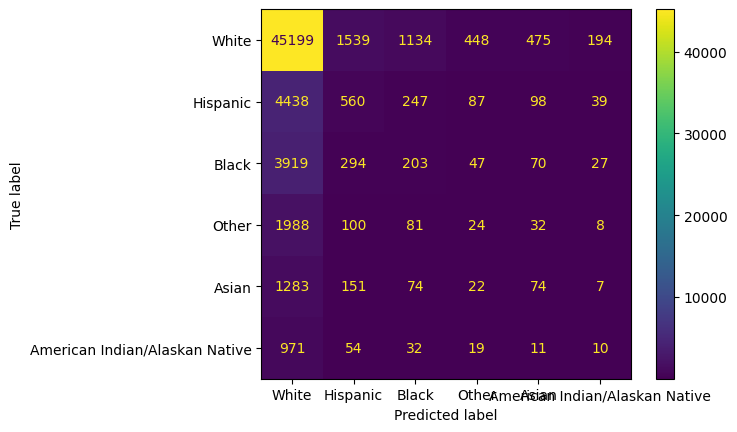

In [ ]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'])

disp.plot(values_format='d')

# Métricas de precisão, revocação, f1-score e acurácia

In [ ]:
print('Accuracy Score')
accuracy_score(y_true = y_test, y_pred = y_predicoes)

Accuracy Score


0.7203051955158774

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score
# Não usar o parâmetro pos_label para problemas multiclasse
precision = precision_score(y_true=y_test, y_pred=y_predicoes, average=None)

# Imprimir a precisão para cada classe
for label, value in zip(unique_labels(y_test, y_predicoes), precision):
    print(f'Precision para classe {label}: {value}')

Precision para classe American Indian/Alaskan Native: 0.03508771929824561
Precision para classe Asian: 0.09736842105263158
Precision para classe Black: 0.11462450592885376
Precision para classe Hispanic: 0.20756115641215717
Precision para classe Other: 0.03709428129829984
Precision para classe White: 0.7820166787778123


In [ ]:
recall = recall_score(y_true=y_test, y_pred=y_predicoes, average=None)

# Imprimir o recall para cada classe
for label, value in zip(unique_labels(y_test, y_predicoes), recall):
    print(f'Recall para classe {label}: {value}')

Recall para classe American Indian/Alaskan Native: 0.009115770282588878
Recall para classe Asian: 0.045934202358783364
Recall para classe Black: 0.04451754385964912
Recall para classe Hispanic: 0.10239531907112817
Recall para classe Other: 0.010747872816838333
Recall para classe White: 0.9226356937271633


In [ ]:
f1 = f1_score(y_true=y_test, y_pred=y_predicoes, average=None)

# Imprimir o F1 score para cada classe
for label, value in zip(unique_labels(y_test, y_predicoes), f1):
    print(f'F1 score para classe {label}: {value}')

F1 score para classe American Indian/Alaskan Native: 0.01447178002894356
F1 score para classe Asian: 0.06242091944327288
F1 score para classe Black: 0.0641288895909019
F1 score para classe Hispanic: 0.13713725970368557
F1 score para classe Other: 0.016666666666666666
F1 score para classe White: 0.8465262625600495


In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print('Classification Report')
print(classification_report(y_test, y_predicoes))

Classification Report
                                precision    recall  f1-score   support

American Indian/Alaskan Native       0.04      0.01      0.01      1097
                         Asian       0.10      0.05      0.06      1611
                         Black       0.11      0.04      0.06      4560
                      Hispanic       0.21      0.10      0.14      5469
                         Other       0.04      0.01      0.02      2233
                         White       0.78      0.92      0.85     48989

                      accuracy                           0.72     63959
                     macro avg       0.21      0.19      0.19     63959
                  weighted avg       0.63      0.72      0.67     63959



In [ ]:
from sklearn.metrics import cohen_kappa_score
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

0.07240686705322541

# Definindo o modelo ideal

No cenário apresentado acima, foram utilizados os seguintes modelos de classificação: Naive Bayes Gaussiano, KNN, Random Forest e Árvores de Decisão. O modelo KNN se mostrou o mais eficiente para o conjunto de dados, uma vez que as métricas de precisão, revocação, f1-score e acurácia apresentaram grande taxa de validade. Isso pode se dar por alguns fatores:


-**Simplicidade e Fácil Implementação**:
O algoritmo KNN é intuitivo e fácil de entender. Ele não exige muitos ajustes de parâmetros e é fácil de implementar, tornando-o uma escolha inicial comum.

- **Versatilidade:**

O KNN pode ser usado tanto para problemas de classificação quanto de regressão. Ele se adapta a diferentes tipos de dados e contextos.

- **Não Paramétrico:**

O KNN é um algoritmo não paramétrico, o que significa que não faz suposições específicas sobre a distribuição dos dados. Isso torna o KNN flexível e capaz de lidar com diferentes formas de dados.

- **Adaptação Dinâmica a Mudanças nos Dados:**

Como o modelo é baseado na proximidade dos pontos de dados, ele pode se adaptar dinamicamente a mudanças nos dados ou a novas amostras sem a necessidade de treinamento completo.
- **Robustez a Outliers:**

O KNN é relativamente robusto a outliers, pois as decisões são baseadas em vizinhanças e não em pontos individuais.